Curating Dataset

In [ ]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [ ]:
len(reviews)

20243

In [ ]:
reviews[0]


'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [ ]:
labels[0]


'POSITIVE'

Developing Predictive Theory

In [ ]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Quick Theory Validation

In [ ]:
from collections import Counter
import numpy as np

In [ ]:
# Create three Counter objects to store positive, negative and total counts
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [ ]:
# Task: Loop over all the words in all the reviews and increment the counts in the appropriate counter objects

for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [ ]:
# Examine the counts of the most common words in positive reviews
positive_counts.most_common()

[('', 445474),
 ('the', 140006),
 ('.', 128722),
 ('and', 72639),
 ('a', 67340),
 ('of', 62463),
 ('to', 53710),
 ('is', 46127),
 ('in', 40632),
 ('br', 39691),
 ('it', 39046),
 ('i', 32899),
 ('that', 28828),
 ('this', 28265),
 ('s', 27390),
 ('as', 21253),
 ('with', 18778),
 ('for', 18231),
 ('was', 17919),
 ('film', 16985),
 ('but', 16658),
 ('movie', 15057),
 ('on', 13753),
 ('his', 13708),
 ('you', 13317),
 ('he', 13060),
 ('are', 11832),
 ('not', 11520),
 ('one', 11073),
 ('t', 11061),
 ('have', 10238),
 ('be', 10104),
 ('all', 9684),
 ('by', 9679),
 ('who', 9378),
 ('an', 9168),
 ('at', 9019),
 ('her', 8932),
 ('from', 8773),
 ('they', 7956),
 ('has', 7434),
 ('so', 7428),
 ('like', 7222),
 ('about', 6740),
 ('very', 6652),
 ('she', 6637),
 ('there', 6530),
 ('out', 6479),
 ('what', 6286),
 ('or', 6224),
 ('good', 6156),
 ('more', 6075),
 ('some', 5995),
 ('when', 5957),
 ('if', 5884),
 ('just', 5785),
 ('can', 5628),
 ('story', 5561),
 ('time', 5309),
 ('well', 5213),
 ('my', 5

In [ ]:
negative_counts.most_common()

[('', 454207),
 ('.', 135870),
 ('the', 131793),
 ('a', 64300),
 ('and', 60360),
 ('of', 56040),
 ('to', 56011),
 ('br', 42489),
 ('is', 40579),
 ('it', 38995),
 ('i', 38154),
 ('in', 35408),
 ('this', 33268),
 ('that', 30340),
 ('s', 25394),
 ('was', 21271),
 ('movie', 20179),
 ('for', 17777),
 ('but', 17585),
 ('with', 16966),
 ('as', 16688),
 ('t', 16433),
 ('film', 15339),
 ('you', 14251),
 ('on', 13926),
 ('not', 13430),
 ('have', 12345),
 ('be', 11904),
 ('are', 11886),
 ('he', 11316),
 ('one', 10613),
 ('they', 10347),
 ('at', 9963),
 ('his', 9875),
 ('all', 9777),
 ('so', 9314),
 ('like', 9113),
 ('there', 8640),
 ('just', 8609),
 ('by', 8546),
 ('an', 8398),
 ('or', 8395),
 ('who', 8057),
 ('from', 7857),
 ('if', 7736),
 ('about', 7358),
 ('out', 7218),
 ('what', 6831),
 ('some', 6711),
 ('no', 6608),
 ('her', 6449),
 ('can', 6245),
 ('has', 6191),
 ('even', 6121),
 ('good', 5999),
 ('bad', 5876),
 ('would', 5768),
 ('up', 5623),
 ('only', 5487),
 ('when', 5448),
 ('more', 544

In this step, common words like "the" appear very often in both positive and negative reviews. Instead of finding the most common words in positive or negative reviews, what I really want are the words found in positive reviews more often than in negative reviews, and vice versa. To accomplish this, I will calculate the ratios of word usage betIen positive and negative reviews.

In [ ]:
#Task: Check all the words you've seen and calculate the ratio of postive to negative uses and store that ratio in pos_neg_ratios.

In [ ]:
pos_neg_ratios = Counter()

# Calculate the ratios of positive and negative uses of the most common words
# Consider words to be "common" if they've been used at least 100 times
for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

In [ ]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 1.0623093615794346
Pos-to-neg ratio for 'amazing' = 3.958139534883721
Pos-to-neg ratio for 'terrible' = 0.17998244073748904


Looking closely at the values I just calculated, I see the following:

Words that I would expect to see more often in positive reviews – like "amazing" – have a ratio greater than 1. The more skeId a word is toward postive, the farther from 1 its positive-to-negative ratio will be.

Words that I would expect to see more often in negative reviews – like "terrible" – have positive values that are less than 1. The more skeId a word is toward negative, the closer to zero its positive-to-negative ratio will be.

Neutral words, which don't really convey any sentiment because I would expect to see them in all sorts of reviews – like "the" – have values very close to 1. A perfectly neutral word – one that was used in exactly the same number of positive reviews as negative reviews – would be almost exactly 1.

The +1 I suggested I add to the denominator slightly biases words toward negative, but it won't matter because it will be a tiny bias and later I'll be ignoring words that are too close to neutral anyway.

I now, the ratios tell us which words are used more often in postive or negative reviews, but the specific values I've calculated are a bit difficult to work with. A very positive word like "amazing" has a value above 4, whereas a very negative word like "terrible" has a value around 0.18. Those values aren't easy to compare for a couple of reasons:

Right now, 1 is considered neutral, but the absolute value of the postive-to-negative rations of very postive words is larger than the absolute value of the ratios for the very negative words. So there is no way to directly compare two numbers and see if one word conveys the same magnitude of positive sentiment as another word conveys negative sentiment. So I should center all the values around netural so the absolute value fro neutral of the postive-to-negative ratio for a word would indicate how much sentiment (positive or negative) that word conveys.
When comparing absolute values it's easier to do that around zero than one.

In [ ]:
#Task: Go through all the ratios you calculated and convert them to logarithms. (i.e. use np.log(ratio))

In [ ]:
# Convert ratios to logs
for word,ratio in pos_neg_ratios.most_common():
    pos_neg_ratios[word] = np.log(ratio)

/tmp/ipython-input-521699427.py:3: RuntimeWarning: divide by zero encountered in log
  pos_neg_ratios[word] = np.log(ratio)


In [ ]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 0.06044518132212597
Pos-to-neg ratio for 'amazing' = 1.3757741004457114
Pos-to-neg ratio for 'terrible' = -1.7148959843087739


In [ ]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', np.float64(4.672828834461906)),
 ('felix', np.float64(3.34109345759245)),
 ('victoria', np.float64(3.0633909220278057)),
 ('bourne', np.float64(3.0204248861443626)),
 ('matthau', np.float64(2.780370862681836)),
 ('polanski', np.float64(2.772588722239781)),
 ('mildred', np.float64(2.7362210780689065)),
 ('gandhi', np.float64(2.538973871058276)),
 ('superbly', np.float64(2.1664529186694654)),
 ('captures', np.float64(2.159484249353372)),
 ('ritter', np.float64(2.153549513833558)),
 ('astaire', np.float64(2.1400661634962708)),
 ('perfection', np.float64(2.1000608288825715)),
 ('andrews', np.float64(2.07159836421881)),
 ('palma', np.float64(2.0149030205422647)),
 ('wonderfully', np.float64(1.976681807722067)),
 ('sinatra', np.float64(1.9509992185627845)),
 ('lincoln', np.float64(1.9129038525871433)),
 ('breathtaking', np.float64(1.8718021769015913)),
 ('refreshing', np.float64(1.8533173622274883)),
 ('jackie', np.float64(1.8191584434161694)),
 ('beautifully', np.float64(1.8015156

In [ ]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('boll', np.float64(-inf)),
 ('seagal', np.float64(-3.6309854756950335)),
 ('incoherent', np.float64(-2.995732273553991)),
 ('mst', np.float64(-2.9245047642656234)),
 ('unfunny', np.float64(-2.6984807500860595)),
 ('pointless', np.float64(-2.6634818816223333)),
 ('waste', np.float64(-2.6527001060190454)),
 ('redeeming', np.float64(-2.501435951739211)),
 ('atrocious', np.float64(-2.477302050402781)),
 ('worst', np.float64(-2.418618784208315)),
 ('blah', np.float64(-2.337676412805316)),
 ('laughable', np.float64(-2.322387720290225)),
 ('zombies', np.float64(-2.2942168433235293)),
 ('uninspired', np.float64(-2.2407096892759584)),
 ('lousy', np.float64(-2.2276220545205905)),
 ('poorly', np.float64(-2.1933858010290535)),
 ('awful', np.float64(-2.1924852319723227)),
 ('boredom', np.float64(-2.159484249353372)),
 ('wasting', np.float64(-2.069779630768099)),
 ('sucks', np.float64(-2.0452083700375936)),
 ('pathetic', np.float64(-2.016383405712699)),
 ('remotely', np.float64(-2.010973742402375)

# Project 2: Transforming Text into Numbers

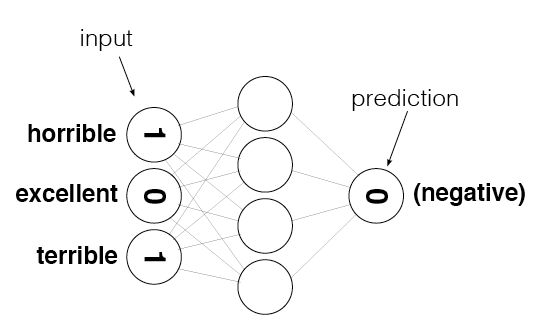

In [ ]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

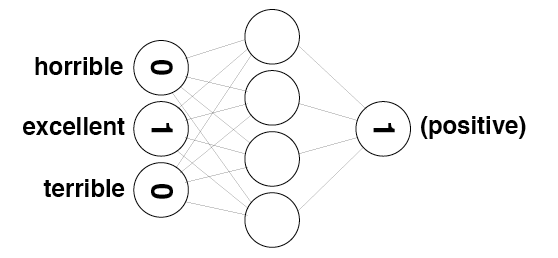

In [ ]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

In [ ]:
#Task: Create a set named vocab that contains every word in the vocabulary.

In [ ]:
vocab = set(total_counts.keys())

In [ ]:
vocab_size = len(vocab)
print(vocab_size)

67760


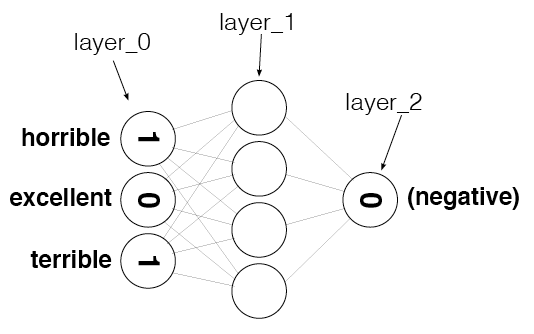

In [ ]:
from IPython.display import Image
Image(filename='sentiment_network_2.png')

In [ ]:
#Task: : Create a numpy array called layer_0 and initialize it to all zeros. You will find the zeros function particularly helpful here. Be sure you create layer_0 as a 2-dimensional matrix with 1 row and vocab_size columns.

In [ ]:
layer_0 = np.zeros((1,vocab_size))

In [ ]:
layer_0.shape

(1, 67760)

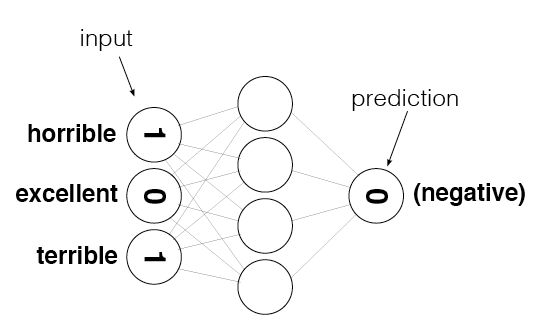

In [ ]:
from IPython.display import Image
Image(filename='sentiment_network.png')

layer_0 contains one entry for every word in the vocabulary, as shown in the above image. I will make sure I know the index of each word, so run the following cell to create a lookup table that stores the index of every word.

In [ ]:
# Create a dictionary of words in the vocabulary mapped to index positions
# (to be used in layer_0)
word2index = {}
for i,word in enumerate(vocab):
    word2index[word] = i

# display the map of words to indices
word2index

{'': 0,
 'fata': 1,
 'harks': 2,
 'veterans': 3,
 'contactable': 4,
 'fellas': 5,
 'savior': 6,
 'dignified': 7,
 'padrino': 8,
 'referee': 9,
 'taratino': 10,
 'trepidous': 11,
 'skinkons': 12,
 'girlpower': 13,
 'maniacally': 14,
 'gamekeeper': 15,
 'boricua': 16,
 'unalike': 17,
 'adulterated': 18,
 'dolt': 19,
 'fondness': 20,
 'movingly': 21,
 'leniency': 22,
 'mashing': 23,
 'ruuun': 24,
 'dour': 25,
 'contingency': 26,
 'portion': 27,
 'liberace': 28,
 'laser': 29,
 'counsellor': 30,
 'crudity': 31,
 'shlock': 32,
 'dumont': 33,
 'rochesters': 34,
 'gitai': 35,
 'reuniting': 36,
 'ditched': 37,
 'stuffy': 38,
 'shunji': 39,
 'reluctant': 40,
 'wilfully': 41,
 'beared': 42,
 'hamnett': 43,
 'succulently': 44,
 'wildfowl': 45,
 'frauds': 46,
 'eloquently': 47,
 'subtler': 48,
 'tehzeeb': 49,
 'pigging': 50,
 'scarface': 51,
 'mccarthyism': 52,
 'boyum': 53,
 'arthurs': 54,
 'munchers': 55,
 'zag': 56,
 'imperiously': 57,
 'environs': 58,
 'virtues': 59,
 'playwright': 60,
 'tracto

In [ ]:
#Task: Complete the implementation of update_input_layer. It should count how many times each word is used in the given review, and then store those counts at the appropriate indices inside layer_0.

In [ ]:
def update_input_layer(review):
    """ Modify the global layer_0 to represent the vector form of review.
    The element at a given index of layer_0 should represent
    how many times the given word occurs in the review.
    Args:
        review(string) - the string of the review
    Returns:
        None
    """

    global layer_0

    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0

    # count how many times each word is used in the given review and store the results in layer_0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

In [ ]:
update_input_layer(reviews[0])
layer_0

array([[18.,  0.,  0., ...,  0.,  0.,  0.]])

In [ ]:
def get_target_for_label(label):
    """Convert a label to `0` or `1`.
    Args:
        label(string) - Either "POSITIVE" or "NEGATIVE".
    Returns:
        `0` or `1`.
    """
    if(label == 'POSITIVE'):
        return 1
    else:
        return 0


In [ ]:
labels[0]

'POSITIVE'

In [ ]:
get_target_for_label(labels[0])

1

In [ ]:
labels[1]

'NEGATIVE'

In [ ]:
get_target_for_label(labels[1])

0

# Project 3: Building a Neural Network

In [ ]:
#Task: I've included the framework of a class called SentimentNetork. Implement all of the items marked  in the code. These include doing the following:

#Create a basic neural network much like the networks you've seen in earlier lessons and in Project 1, with an input layer, a hidden layer, and an output layer.
#Do not add a non-linearity in the hidden layer. That is, do not use an activation function when calculating the hidden layer outputs.
#Re-use the code from earlier in this project notebook to create the training data (see s in the code)
#Implement the pre_process_data function to create the vocabulary for our training data generating functions
#Ensure train trains over the entire corpus

In [ ]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training

        """
        # Assign a seed to our random number generator to ensure I get
        # reproducable results during development
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)

        # Build the network to have the number of hidden nodes and the learning rate that
        # Ire passed into this project initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):

        # populate review_vocab with all of the words in the given reviews
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)

        # Convert the vocabulary set to a list so I can access words via indices
        self.review_vocab = list(review_vocab)

        # populate label_vocab with all of the words in the given labels.
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)

        # Convert the label vocabulary set to a list so I can access labels via indices
        self.label_vocab = list(label_vocab)

        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)

        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i

        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i

    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize Iights

        # These are the Iights betIen the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))

        # These are the Iights betIen the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5,
                                                (self.hidden_nodes, self.output_nodes))

        # The input layer, a two-dimensional matrix with shape 1 x input_nodes
        self.layer_0 = np.zeros((1,input_nodes))

    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0

        for word in review.split(" "):
            # NOTE: This if-check was not in the version of this project method created in Project 2,
            #       and it appears in Andrew's Project 3 solution without explanation.
            #       It simply ensures the word is actually a key in word2index before
            #       accessing it, which is important because accessing an invalid key
            #       with raise an exception in Python. This allows us to ignore unknown
            #       words encountered in new reviews.
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] += 1

    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0

    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)

    def train(self, training_reviews, training_labels):

        # make sure out I have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))

        # Keep track of correct predictions to display accuracy during training
        correct_so_far = 0

        # Remember when I started for printing time statistics
        start = time.time()

        # loop through all the given reviews and run a forward and backward pass,
        # updating Iights for every item
        for i in range(len(training_reviews)):

            # Get the next review and its correct label
            review = training_reviews[i]
            label = training_labels[i]

            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the Iights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            # Keep track of correct predictions.
            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1

            # For debug purposes, print out our prediction accuracy and speed
            # throughout the training process.
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0

            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")

    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """

        # keep track of how many correct predictions I make
        correct = 0

        # I'll time how many predictions per second I make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label.
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1

            # For debug purposes, print out our prediction accuracy and speed
            # throughout the prediction process.

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0

            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")

    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # Run a forward pass through the network, like in the "train" function.

        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

        # Return POSITIVE for values above greater-than-or-equal-to 0.5 in the output layer;
        # return NEGATIVE for other values
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"


In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):535.5 #Correct:500 #Tested:1000 Testing Accuracy:50.0%

**I have not trained the model yet, so the results should be about 50% as it will just be guessing and there are only two possible values to choose from.**

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):745.3 #Correct:500 #Tested:1000 Testing Accuracy:50.0%

In [ ]:
#Training the network

In [ ]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):194.5 #Correct:1251 #Trained:2501 Training Accuracy:50.0%
Progress:20.8% Speed(reviews/sec):189.6 #Correct:2501 #Trained:5001 Training Accuracy:50.0%
Progress:31.2% Speed(reviews/sec):189.8 #Correct:3751 #Trained:7501 Training Accuracy:50.0%
Progress:41.6% Speed(reviews/sec):192.7 #Correct:5001 #Trained:10001 Training Accuracy:50.0%
Progress:52.0% Speed(reviews/sec):194.4 #Correct:6251 #Trained:12501 Training Accuracy:50.0%
Progress:62.5% Speed(reviews/sec):190.1 #Correct:7501 #Trained:15001 Training Accuracy:50.0%
Progress:72.9% Speed(reviews/sec):190.5 #Correct:8751 #Trained:17501 Training Accuracy:50.0%
Progress:83.3% Speed(reviews/sec):191.0 #Correct:10001 #Trained:20001 Training Accuracy:50.0%
Progress:93.7% Speed(reviews/sec):191.7 #Correct:11251 #Trained:22501 Training Accuracy:50.0%
Progress:99.9% Speed(reviews/sec):189.9 #Correct:12000 #Trained:24000 Training Ac

That most likely didn't train very Ill. Part of the reason may be because the learning rate is too high. Run the following cell to recreate the network with a smaller learning rate, 0.01, and then train the new network.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):193.9 #Correct:1248 #Trained:2501 Training Accuracy:49.9%
Progress:20.8% Speed(reviews/sec):190.2 #Correct:2498 #Trained:5001 Training Accuracy:49.9%
Progress:31.2% Speed(reviews/sec):190.3 #Correct:3748 #Trained:7501 Training Accuracy:49.9%
Progress:41.6% Speed(reviews/sec):189.0 #Correct:4998 #Trained:10001 Training Accuracy:49.9%
Progress:52.0% Speed(reviews/sec):187.3 #Correct:6248 #Trained:12501 Training Accuracy:49.9%
Progress:62.5% Speed(reviews/sec):187.6 #Correct:7491 #Trained:15001 Training Accuracy:49.9%
Progress:72.9% Speed(reviews/sec):187.7 #Correct:8742 #Trained:17501 Training Accuracy:49.9%
Progress:83.3% Speed(reviews/sec):187.8 #Correct:10010 #Trained:20001 Training Accuracy:50.0%
Progress:93.7% Speed(reviews/sec):187.9 #Correct:11260 #Trained:22501 Training Accuracy:50.0%
Progress:99.9% Speed(reviews/sec):186.8 #Correct:12009 #Trained:24000 Training Ac

That probably wasn't much different. Run the following cell to recreate the network one more time with an even smaller learning rate, 0.001, and then train the new network.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):192.5 #Correct:1268 #Trained:2501 Training Accuracy:50.6%
Progress:20.8% Speed(reviews/sec):193.7 #Correct:2613 #Trained:5001 Training Accuracy:52.2%
Progress:31.2% Speed(reviews/sec):195.5 #Correct:3994 #Trained:7501 Training Accuracy:53.2%
Progress:41.6% Speed(reviews/sec):194.4 #Correct:5492 #Trained:10001 Training Accuracy:54.9%
Progress:52.0% Speed(reviews/sec):194.4 #Correct:7070 #Trained:12501 Training Accuracy:56.5%
Progress:62.5% Speed(reviews/sec):192.8 #Correct:8673 #Trained:15001 Training Accuracy:57.8%
Progress:72.9% Speed(reviews/sec):192.7 #Correct:10227 #Trained:17501 Training Accuracy:58.4%
Progress:83.3% Speed(reviews/sec):192.2 #Correct:11888 #Trained:20001 Training Accuracy:59.4%
Progress:93.7% Speed(reviews/sec):191.1 #Correct:13622 #Trained:22501 Training Accuracy:60.5%
Progress:99.9% Speed(reviews/sec):189.4 #Correct:14682 #Trained:24000 Training A

With a learning rate of 0.001, the network should finally have started to improve during training. It's still not very good, but it shows that this solution has potential. I will improve it in the next lesson.

#Understanding Neural Noise

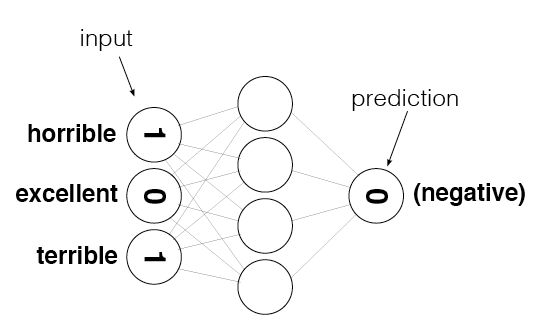

In [ ]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [ ]:
def update_input_layer(review):

    global layer_0

    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [ ]:
layer_0

array([[18.,  0.,  0., ...,  0.,  0.,  0.]])

In [ ]:
review_counter = Counter()

In [ ]:
for word in reviews[0].split(" "):
    review_counter[word] += 1

In [ ]:
review_counter.most_common()

[('.', 27),
 ('', 18),
 ('the', 9),
 ('to', 6),
 ('high', 5),
 ('i', 5),
 ('bromwell', 4),
 ('is', 4),
 ('a', 4),
 ('teachers', 4),
 ('that', 4),
 ('of', 4),
 ('it', 2),
 ('at', 2),
 ('as', 2),
 ('school', 2),
 ('my', 2),
 ('in', 2),
 ('me', 2),
 ('students', 2),
 ('their', 2),
 ('student', 2),
 ('cartoon', 1),
 ('comedy', 1),
 ('ran', 1),
 ('same', 1),
 ('time', 1),
 ('some', 1),
 ('other', 1),
 ('programs', 1),
 ('about', 1),
 ('life', 1),
 ('such', 1),
 ('years', 1),
 ('teaching', 1),
 ('profession', 1),
 ('lead', 1),
 ('believe', 1),
 ('s', 1),
 ('satire', 1),
 ('much', 1),
 ('closer', 1),
 ('reality', 1),
 ('than', 1),
 ('scramble', 1),
 ('survive', 1),
 ('financially', 1),
 ('insightful', 1),
 ('who', 1),
 ('can', 1),
 ('see', 1),
 ('right', 1),
 ('through', 1),
 ('pathetic', 1),
 ('pomp', 1),
 ('pettiness', 1),
 ('whole', 1),
 ('situation', 1),
 ('all', 1),
 ('remind', 1),
 ('schools', 1),
 ('knew', 1),
 ('and', 1),
 ('when', 1),
 ('saw', 1),
 ('episode', 1),
 ('which', 1),
 ('r

#Project 4: Reducing Noise in Our Input Data

In [ ]:
#Task: Attempt to reduce the noise in the input data like Andrew did in the previous video. Specifically, do the following:

#Copy the SentimentNetwork class you created earlier into the following cell.
#Modify update_input_layer so it does not count how many times each word is used, but rather just stores whether or not a word was used.

In [ ]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training

        """
        # Assign a seed to our random number generator to ensure I get
        # reproducable results during development
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)

        # Build the network to have the number of hidden nodes and the learning rate that
        # Ire passed into this project initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):

        # populate review_vocab with all of the words in the given reviews
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)

        # Convert the vocabulary set to a list so I can access words via indices
        self.review_vocab = list(review_vocab)

        # populate label_vocab with all of the words in the given labels.
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)

        # Convert the label vocabulary set to a list so I can access labels via indices
        self.label_vocab = list(label_vocab)

        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)

        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i

        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i

    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize Iights

        # These are the Iights betIen the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))

        # These are the Iights betIen the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5,
                                                (self.hidden_nodes, self.output_nodes))

        # The input layer, a two-dimensional matrix with shape 1 x input_nodes
        self.layer_0 = np.zeros((1,input_nodes))


    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0

        for word in review.split(" "):
            # NOTE: This if-check was not in the version of this project method created in Project 2,
            #       and it appears in Andrew's Project 3 solution without explanation.
            #       It simply ensures the word is actually a key in word2index before
            #       accessing it, which is important because accessing an invalid key
            #       with raise an exception in Python. This allows us to ignore unknown
            #       words encountered in new reviews.
            if(word in self.word2index.keys()):
                ## New for Project 4: changed to set to 1 instead of add 1
                self.layer_0[0][self.word2index[word]] = 1

    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0

    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)

    def train(self, training_reviews, training_labels):

        # make sure out I have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))

        # Keep track of correct predictions to display accuracy during training
        correct_so_far = 0

        # Remember when I started for printing time statistics
        start = time.time()

        # loop through all the given reviews and run a forward and backward pass,
        # updating Iights for every item
        for i in range(len(training_reviews)):

            # Get the next review and its correct label
            review = training_reviews[i]
            label = training_labels[i]

            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the Iights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            # Keep track of correct predictions.
            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1

            # For debug purposes, print out our prediction accuracy and speed
            # throughout the training process.
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0

            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")

    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """

        # keep track of how many correct predictions I make
        correct = 0

        # I'll time how many predictions per second I make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label.
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1

            # For debug purposes, print out our prediction accuracy and speed
            # throughout the prediction process.

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0

            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")

    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # Run a forward pass through the network, like in the "train" function.

        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

        # Return POSITIVE for values above greater-than-or-equal-to 0.5 in the output layer;
        # return NEGATIVE for other values
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"


In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):226.2 #Correct:1865 #Trained:2501 Training Accuracy:74.5%
Progress:20.8% Speed(reviews/sec):223.6 #Correct:3826 #Trained:5001 Training Accuracy:76.5%
Progress:31.2% Speed(reviews/sec):217.5 #Correct:5901 #Trained:7501 Training Accuracy:78.6%
Progress:41.6% Speed(reviews/sec):211.6 #Correct:8014 #Trained:10001 Training Accuracy:80.1%
Progress:52.0% Speed(reviews/sec):208.7 #Correct:10136 #Trained:12501 Training Accuracy:81.0%
Progress:62.5% Speed(reviews/sec):207.1 #Correct:12260 #Trained:15001 Training Accuracy:81.7%
Progress:72.9% Speed(reviews/sec):206.4 #Correct:14381 #Trained:17501 Training Accuracy:82.1%
Progress:83.3% Speed(reviews/sec):204.6 #Correct:16570 #Trained:20001 Training Accuracy:82.8%
Progress:93.7% Speed(reviews/sec):202.6 #Correct:18760 #Trained:22501 Training Accuracy:83.3%
Progress:99.9% Speed(reviews/sec):201.7 #Correct:20090 #Trained:24000 Training

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):366.0 #Correct:853 #Tested:1000 Testing Accuracy:85.3%

#Analyzing Inefficiencies in our Network

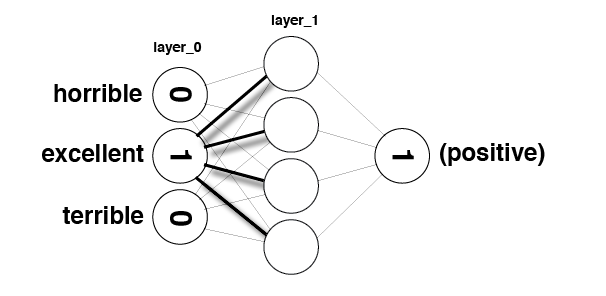

In [ ]:
Image(filename='sentiment_network_sparse.png')

In [ ]:
layer_0 = np.zeros(10)

In [ ]:
layer_0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
layer_0[4] = 1
layer_0[9] = 1

In [ ]:
layer_0

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1.])

In [ ]:
weights_0_1 = np.random.randn(10,5)

In [ ]:
layer_0.dot(weights_0_1)

array([-0.10503756,  0.44222989,  0.24392938, -0.55961832,  0.21389503])

In [ ]:
indices = [4,9]

In [ ]:
layer_1 = np.zeros(5)

In [ ]:
for index in indices:
    layer_1 += (1 * weights_0_1[index])

In [ ]:
layer_1

array([-0.10503756,  0.44222989,  0.24392938, -0.55961832,  0.21389503])

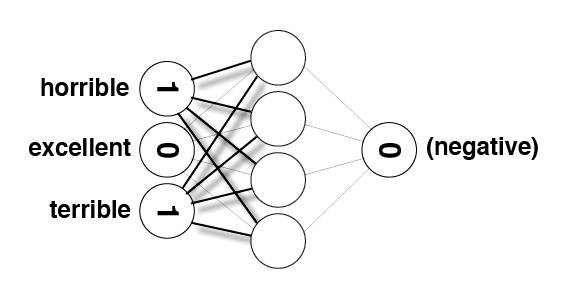

In [ ]:
Image(filename='sentiment_network_sparse_2.png')

In [ ]:
layer_1 = np.zeros(5)

In [ ]:
for index in indices:
    layer_1 += (weights_0_1[index])

In [ ]:
layer_1

array([-0.10503756,  0.44222989,  0.24392938, -0.55961832,  0.21389503])

#Project 5: Making our Network More Efficient

In [ ]:
#Task: Make the SentimentNetwork class more efficient by eliminating unnecessary multiplications and additions that occur during forward and backward propagation. To do that, I can do the following:

#Copy the SentimentNetwork class from the previous project into the following cell.
#Remove the update_input_layer function - you will not need it in this project version.
#Modify init_network:
#Modify train:
#Modify run:

#Change the name of the input parameter training_reviews to training_reviews_raw. This will help with the next step.
#At the beginning of the function, you'll want to preprocess your reviews to convert them to a list of indices (from word2index) that are actually used in the review. This is equivalent to what you saw in the video when Andrew set specific indices to 1. Your code should create a local list variable named training_reviews that should contain a list for each review in training_reviews_raw. Those lists should contain the indices for words found in the review.
#Remove call to update_input_layer
#Use self's layer_1 instead of a local layer_1 object.
#In the forward pass, replace the code that updates layer_1 with new logic that only adds the Iights for the indices used in the review.
#When updating Iights_0_1, only update the individual Iights that Ire used in the forward pass.
#You no longer need a separate input layer, so remove any mention of self.layer_0
#You will be dealing with the old hidden layer more directly, so create self.layer_1, a two-dimensional matrix with shape 1 x hidden_nodes, with all values initialized to zero
#Remove call to update_input_layer
#Use self's layer_1 instead of a local layer_1 object.
#Much like you did in train, you will need to pre-process the review so I can work with word indices, then update layer_1 by adding Iights for the indices used in the review.

In [ ]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training

        """
        # Assign a seed to our random number generator to ensure I get
        # reproducable results during development
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)

        # Build the network to have the number of hidden nodes and the learning rate that
        # Ire passed into this project initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):

        # populate review_vocab with all of the words in the given reviews
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)

        # Convert the vocabulary set to a list so I can access words via indices
        self.review_vocab = list(review_vocab)

        # populate label_vocab with all of the words in the given labels.
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)

        # Convert the label vocabulary set to a list so I can access labels via indices
        self.label_vocab = list(label_vocab)

        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)

        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i

        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i

    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize Iights

        # These are the Iights betIen the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))

        # These are the Iights betIen the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5,
                                                (self.hidden_nodes, self.output_nodes))

        ## New for Project 5: Removed self.layer_0; added self.layer_1
        # The input layer, a two-dimensional matrix with shape 1 x hidden_nodes
        self.layer_1 = np.zeros((1,hidden_nodes))

    ## New for Project 5: Removed update_input_layer function

    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0

    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)

    ## New for Project 5: changed name of first parameter form 'training_reviews'
    #                     to 'training_reviews_raw'
    def train(self, training_reviews_raw, training_labels):

        ## New for Project 5: pre-process training reviews so I can deal
        #                     directly with the indices of non-zero inputs
        training_reviews = list()
        for review in training_reviews_raw:
            indices = set()
            for word in review.split(" "):
                if(word in self.word2index.keys()):
                    indices.add(self.word2index[word])
            training_reviews.append(list(indices))

        # make sure out I have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))

        # Keep track of correct predictions to display accuracy during training
        correct_so_far = 0

        # Remember when I started for printing time statistics
        start = time.time()

        # loop through all the given reviews and run a forward and backward pass,
        # updating Iights for every item
        for i in range(len(training_reviews)):

            # Get the next review and its correct label
            review = training_reviews[i]
            label = training_labels[i]

            #### Implement the forward pass here ####
            ### Forward pass ###

            ## New for Project 5: Removed call to 'update_input_layer' function
            #                     because 'layer_0' is no longer used

            # Hidden layer
            ## New for Project 5: Add in only the Iights for non-zero items
            self.layer_1 *= 0
            for index in review:
                self.layer_1 += self.weights_0_1[index]

            # Output layer
            ## New for Project 5: changed to use 'self.layer_1' instead of 'local layer_1'
            layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the Iights
            ## New for Project 5: changed to use 'self.layer_1' instead of local 'layer_1'
            self.weights_1_2 -= self.layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step

            ## New for Project 5: Only update the Iights that Ire used in the forward pass
            for index in review:
                self.weights_0_1[index] -= layer_1_delta[0] * self.learning_rate # update input-to-hidden weights with gradient descent step

            # Keep track of correct predictions.
            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1

            # For debug purposes, print out our prediction accuracy and speed
            # throughout the training process.
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0

            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")

    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """

        # keep track of how many correct predictions I make
        correct = 0

        # I'll time how many predictions per second I make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label.
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1

            # For debug purposes, print out our prediction accuracy and speed
            # throughout the prediction process.

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0

            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")

    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # Run a forward pass through the network, like in the "train" function.

        ## New for Project 5: Removed call to update_input_layer function
        #                     because layer_0 is no longer used

        # Hidden layer
        ## New for Project 5: Identify the indices used in the review and then add
        #                     just those Iights to layer_1
        self.layer_1 *= 0
        unique_indices = set()
        for word in review.lower().split(" "):
            if word in self.word2index.keys():
                unique_indices.add(self.word2index[word])
        for index in unique_indices:
            self.layer_1 += self.weights_0_1[index]

        # Output layer
        ## New for Project 5: changed to use self.layer_1 instead of local layer_1
        layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))

        # Return POSITIVE for values above greater-than-or-equal-to 0.5 in the output layer;
        # return NEGATIVE for other values
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):1745. #Correct:1807 #Trained:2501 Training Accuracy:72.2%
Progress:20.8% Speed(reviews/sec):1672. #Correct:3793 #Trained:5001 Training Accuracy:75.8%
Progress:31.2% Speed(reviews/sec):1695. #Correct:5866 #Trained:7501 Training Accuracy:78.2%
Progress:41.6% Speed(reviews/sec):1706. #Correct:8017 #Trained:10001 Training Accuracy:80.1%
Progress:52.0% Speed(reviews/sec):1558. #Correct:10152 #Trained:12501 Training Accuracy:81.2%
Progress:62.5% Speed(reviews/sec):1487. #Correct:12280 #Trained:15001 Training Accuracy:81.8%
Progress:72.9% Speed(reviews/sec):1514. #Correct:14399 #Trained:17501 Training Accuracy:82.2%
Progress:83.3% Speed(reviews/sec):1534. #Correct:16584 #Trained:20001 Training Accuracy:82.9%
Progress:93.7% Speed(reviews/sec):1545. #Correct:18778 #Trained:22501 Training Accuracy:83.4%
Progress:99.9% Speed(reviews/sec):1553. #Correct:20095 #Trained:24000 Training

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])


Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Tested:1 Testing Accuracy:100.%
Progress:0.1% Speed(reviews/sec):1264. #Correct:1 #Tested:2 Testing Accuracy:50.0%
Progress:0.2% Speed(reviews/sec):2176. #Correct:2 #Tested:3 Testing Accuracy:66.6%
Progress:0.3% Speed(reviews/sec):2592. #Correct:3 #Tested:4 Testing Accuracy:75.0%
Progress:0.4% Speed(reviews/sec):3137. #Correct:4 #Tested:5 Testing Accuracy:80.0%
Progress:0.5% Speed(reviews/sec):3268. #Correct:5 #Tested:6 Testing Accuracy:83.3%
Progress:0.6% Speed(reviews/sec):3158. #Correct:6 #Tested:7 Testing Accuracy:85.7%
Progress:0.7% Speed(reviews/sec):3058. #Correct:7 #Tested:8 Testing Accuracy:87.5%
Progress:0.8% Speed(reviews/sec):3116. #Correct:8 #Tested:9 Testing Accuracy:88.8%
Progress:0.9% Speed(reviews/sec):2483. #Correct:9 #Tested:10 Testing Accuracy:90.0%
Progress:1.0% Speed(reviews/sec):2530. #Correct:10 #Tested:11 Testing Accuracy:90.9%
Progress:1.1% Speed(reviews/sec):2629. #Correct:11 #Tested:12 Testing Accuracy:91.6%


#Project 6: Reducing Noise by Strategically Reducing the Vocabulary

In [ ]:
#Task: Improve SentimentNetwork's performance by reducing more noise in the vocabulary. Specifically, do the following:

#Copy the SentimentNetwork class from the previous project into the following cell.
#Modify pre_process_data:
#Modify __init__:
#Add two additional parameters: min_count and polarity_cutoff
#Calculate the positive-to-negative ratios of words used in the reviews. (You can use code you've written elsewhere in the notebook, but I are moving it into the class like I did with other helper code earlier.)
#Andrew's solution only calculates a postive-to-negative ratio for words that occur at least 50 times. This keeps the network from attributing too much sentiment to rarer words. You can choose to add this project to your solution if you would like.
#Change so words are only added to the vocabulary if they occur in the vocabulary more than min_count times.
#Change so words are only added to the vocabulary if the absolute value of their postive-to-negative ratio is at least polarity_cutoff
#Add the same two parameters (min_count and polarity_cutoff) and use them when you call pre_process_data

In [ ]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    ## New for Project 6: added min_count and polarity_cutoff parameters
    def __init__(self, reviews,labels,min_count = 10,polarity_cutoff = 0.1,hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            min_count(int) - Words should only be added to the vocabulary
                             if they occur more than this many times
            polarity_cutoff(float) - The absolute value of a word's positive-to-negative
                                     ratio must be at least this big to be considered.
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training

        """
        # Assign a seed to our random number generator to ensure I get
        # reproducable results during development
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        ## New for Project 6: added min_count and polarity_cutoff arguments to pre_process_data call
        self.pre_process_data(reviews, labels, polarity_cutoff, min_count)

        # Build the network to have the number of hidden nodes and the learning rate that
        # Ire passed into this project initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    ## New for Project 6: added min_count and polarity_cutoff parameters
    def pre_process_data(self, reviews, labels, polarity_cutoff, min_count):

        ## ----------------------------------------
        ## New for Project 6: Calculate positive-to-negative ratios for words before
        #                     building vocabulary
        #
        positive_counts = Counter()
        negative_counts = Counter()
        total_counts = Counter()

        for i in range(len(reviews)):
            if(labels[i] == 'POSITIVE'):
                for word in reviews[i].split(" "):
                    positive_counts[word] += 1
                    total_counts[word] += 1
            else:
                for word in reviews[i].split(" "):
                    negative_counts[word] += 1
                    total_counts[word] += 1

        pos_neg_ratios = Counter()

        for term,cnt in list(total_counts.most_common()):
            if(cnt >= 50):
                pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
                pos_neg_ratios[term] = pos_neg_ratio

        for word,ratio in pos_neg_ratios.most_common():
            if(ratio > 1):
                pos_neg_ratios[word] = np.log(ratio)
            else:
                pos_neg_ratios[word] = -np.log((1 / (ratio + 0.01)))
        #
        ## end New for Project 6
        ## ----------------------------------------

        # populate review_vocab with all of the words in the given reviews
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                ## New for Project 6: only add words that occur at least min_count times
                #                     and for words with pos/neg ratios, only add words
                #                     that meet the polarity_cutoff
                if(total_counts[word] > min_count):
                    if(word in pos_neg_ratios.keys()):
                        if((pos_neg_ratios[word] >= polarity_cutoff) or (pos_neg_ratios[word] <= -polarity_cutoff)):
                            review_vocab.add(word)
                    else:
                        review_vocab.add(word)

        # Convert the vocabulary set to a list so I can access words via indices
        self.review_vocab = list(review_vocab)

        # populate label_vocab with all of the words in the given labels.
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)

        # Convert the label vocabulary set to a list so I can access labels via indices
        self.label_vocab = list(label_vocab)

        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)

        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i

        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i

    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize Iights

        # These are the Iights betIen the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))

        # These are the Iights betIen the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5,
                                                (self.hidden_nodes, self.output_nodes))

        ## New for Project 5: Removed self.layer_0; added self.layer_1
        # The input layer, a two-dimensional matrix with shape 1 x hidden_nodes
        self.layer_1 = np.zeros((1,hidden_nodes))

    ## New for Project 5: Removed update_input_layer function

    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0

    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)

    ## New for Project 5: changed name of first parameter form 'training_reviews'
    #                     to 'training_reviews_raw'
    def train(self, training_reviews_raw, training_labels):

        ## New for Project 5: pre-process training reviews so I can deal
        #                     directly with the indices of non-zero inputs
        training_reviews = list()
        for review in training_reviews_raw:
            indices = set()
            for word in review.split(" "):
                if(word in self.word2index.keys()):
                    indices.add(self.word2index[word])
            training_reviews.append(list(indices))

        # make sure out I have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))

        # Keep track of correct predictions to display accuracy during training
        correct_so_far = 0

        # Remember when I started for printing time statistics
        start = time.time()

        # loop through all the given reviews and run a forward and backward pass,
        # updating Iights for every item
        for i in range(len(training_reviews)):

            # Get the next review and its correct label
            review = training_reviews[i]
            label = training_labels[i]

            #### Implement the forward pass here ####
            ### Forward pass ###

            ## New for Project 5: Removed call to 'update_input_layer' function
            #                     because 'layer_0' is no longer used

            # Hidden layer
            ## New for Project 5: Add in only the Iights for non-zero items
            self.layer_1 *= 0
            for index in review:
                self.layer_1 += self.weights_0_1[index]

            # Output layer
            ## New for Project 5: changed to use 'self.layer_1' instead of 'local layer_1'
            layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the Iights
            ## New for Project 5: changed to use 'self.layer_1' instead of local 'layer_1'
            self.weights_1_2 -= self.layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step

            ## New for Project 5: Only update the Iights that Ire used in the forward pass
            for index in review:
                self.weights_0_1[index] -= layer_1_delta[0] * self.learning_rate # update input-to-hidden weights with gradient descent step

            # Keep track of correct predictions.
            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1

            # For debug purposes, print out our prediction accuracy and speed
            # throughout the training process.
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0

            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")

    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """

        # keep track of how many correct predictions I make
        correct = 0

        # I'll time how many predictions per second I make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label.
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1

            # For debug purposes, print out our prediction accuracy and speed
            # throughout the prediction process.

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0

            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")

    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # Run a forward pass through the network, like in the "train" function.

        ## New for Project 5: Removed call to update_input_layer function
        #                     because layer_0 is no longer used

        # Hidden layer
        ## New for Project 5: Identify the indices used in the review and then add
        #                     just those Iights to layer_1
        self.layer_1 *= 0
        unique_indices = set()
        for word in review.lower().split(" "):
            if word in self.word2index.keys():
                unique_indices.add(self.word2index[word])
        for index in unique_indices:
            self.layer_1 += self.weights_0_1[index]

        # Output layer
        ## New for Project 5: changed to use self.layer_1 instead of local layer_1
        layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))

        # Return POSITIVE for values above greater-than-or-equal-to 0.5 in the output layer;
        # return NEGATIVE for other values
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.05,learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):2173. #Correct:1994 #Trained:2501 Training Accuracy:79.7%
Progress:20.8% Speed(reviews/sec):2125. #Correct:4063 #Trained:5001 Training Accuracy:81.2%
Progress:31.2% Speed(reviews/sec):2094. #Correct:6176 #Trained:7501 Training Accuracy:82.3%
Progress:41.6% Speed(reviews/sec):2035. #Correct:8336 #Trained:10001 Training Accuracy:83.3%
Progress:52.0% Speed(reviews/sec):1747. #Correct:10501 #Trained:12501 Training Accuracy:84.0%
Progress:62.5% Speed(reviews/sec):1773. #Correct:12641 #Trained:15001 Training Accuracy:84.2%
Progress:72.9% Speed(reviews/sec):1805. #Correct:14782 #Trained:17501 Training Accuracy:84.4%
Progress:83.3% Speed(reviews/sec):1833. #Correct:16954 #Trained:20001 Training Accuracy:84.7%
Progress:93.7% Speed(reviews/sec):1851. #Correct:19143 #Trained:22501 Training Accuracy:85.0%
Progress:99.9% Speed(reviews/sec):1862. #Correct:20461 #Trained:24000 Training

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])


Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Tested:1 Testing Accuracy:100.%
Progress:0.1% Speed(reviews/sec):1227. #Correct:1 #Tested:2 Testing Accuracy:50.0%
Progress:0.2% Speed(reviews/sec):2104. #Correct:2 #Tested:3 Testing Accuracy:66.6%
Progress:0.3% Speed(reviews/sec):2570. #Correct:3 #Tested:4 Testing Accuracy:75.0%
Progress:0.4% Speed(reviews/sec):3163. #Correct:4 #Tested:5 Testing Accuracy:80.0%
Progress:0.5% Speed(reviews/sec):3354. #Correct:5 #Tested:6 Testing Accuracy:83.3%
Progress:0.6% Speed(reviews/sec):3183. #Correct:6 #Tested:7 Testing Accuracy:85.7%
Progress:0.7% Speed(reviews/sec):3197. #Correct:7 #Tested:8 Testing Accuracy:87.5%
Progress:0.8% Speed(reviews/sec):3319. #Correct:8 #Tested:9 Testing Accuracy:88.8%
Progress:0.9% Speed(reviews/sec):2722. #Correct:9 #Tested:10 Testing Accuracy:90.0%
Progress:1.0% Speed(reviews/sec):2770. #Correct:10 #Tested:11 Testing Accuracy:90.9%
Progress:1.1% Speed(reviews/sec):2885. #Correct:11 #Tested:12 Testing Accuracy:91.6%


In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.8,learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])


Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):12786 #Correct:2114 #Trained:2501 Training Accuracy:84.5%
Progress:20.8% Speed(reviews/sec):11574 #Correct:4235 #Trained:5001 Training Accuracy:84.6%
Progress:31.2% Speed(reviews/sec):10399 #Correct:6362 #Trained:7501 Training Accuracy:84.8%
Progress:41.6% Speed(reviews/sec):10616 #Correct:8513 #Trained:10001 Training Accuracy:85.1%
Progress:52.0% Speed(reviews/sec):10740 #Correct:10641 #Trained:12501 Training Accuracy:85.1%
Progress:62.5% Speed(reviews/sec):10743 #Correct:12796 #Trained:15001 Training Accuracy:85.3%
Progress:72.9% Speed(reviews/sec):10496 #Correct:14911 #Trained:17501 Training Accuracy:85.2%
Progress:83.3% Speed(reviews/sec):10447 #Correct:17077 #Trained:20001 Training Accuracy:85.3%
Progress:93.7% Speed(reviews/sec):10386 #Correct:19258 #Trained:22501 Training Accuracy:85.5%
Progress:99.9% Speed(reviews/sec):10481 #Correct:20552 #Trained:24000 Trainin

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])


Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Tested:1 Testing Accuracy:0.0%
Progress:0.1% Speed(reviews/sec):2692. #Correct:1 #Tested:2 Testing Accuracy:50.0%
Progress:0.2% Speed(reviews/sec):4507. #Correct:2 #Tested:3 Testing Accuracy:66.6%
Progress:0.3% Speed(reviews/sec):5212. #Correct:3 #Tested:4 Testing Accuracy:75.0%
Progress:0.4% Speed(reviews/sec):6218. #Correct:3 #Tested:5 Testing Accuracy:60.0%
Progress:0.5% Speed(reviews/sec):6795. #Correct:4 #Tested:6 Testing Accuracy:66.6%
Progress:0.6% Speed(reviews/sec):6807. #Correct:5 #Tested:7 Testing Accuracy:71.4%
Progress:0.7% Speed(reviews/sec):6940. #Correct:6 #Tested:8 Testing Accuracy:75.0%
Progress:0.8% Speed(reviews/sec):7169. #Correct:7 #Tested:9 Testing Accuracy:77.7%
Progress:0.9% Speed(reviews/sec):6203. #Correct:8 #Tested:10 Testing Accuracy:80.0%
Progress:1.0% Speed(reviews/sec):6174. #Correct:9 #Tested:11 Testing Accuracy:81.8%
Progress:1.1% Speed(reviews/sec):6415. #Correct:10 #Tested:12 Testing Accuracy:83.3%
Pr

#Analysis: What's Going on in the Iights?

In [ ]:
mlp_full = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=0,polarity_cutoff=0,learning_rate=0.01)

In [ ]:
mlp_full.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):1726. #Correct:1962 #Trained:2501 Training Accuracy:78.4%
Progress:20.8% Speed(reviews/sec):1690. #Correct:4002 #Trained:5001 Training Accuracy:80.0%
Progress:31.2% Speed(reviews/sec):1689. #Correct:6120 #Trained:7501 Training Accuracy:81.5%
Progress:41.6% Speed(reviews/sec):1693. #Correct:8271 #Trained:10001 Training Accuracy:82.7%
Progress:52.0% Speed(reviews/sec):1457. #Correct:10431 #Trained:12501 Training Accuracy:83.4%
Progress:62.5% Speed(reviews/sec):1496. #Correct:12565 #Trained:15001 Training Accuracy:83.7%
Progress:72.9% Speed(reviews/sec):1517. #Correct:14670 #Trained:17501 Training Accuracy:83.8%
Progress:83.3% Speed(reviews/sec):1537. #Correct:16833 #Trained:20001 Training Accuracy:84.1%
Progress:93.7% Speed(reviews/sec):1548. #Correct:19015 #Trained:22501 Training Accuracy:84.5%
Progress:99.9% Speed(reviews/sec):1555. #Correct:20335 #Trained:24000 Training

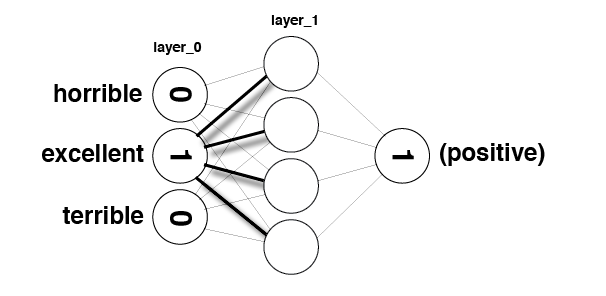

In [ ]:
Image(filename='sentiment_network_sparse.png')

In [ ]:
def get_most_similar_words(focus = "horrible"):
    most_similar = Counter()

    for word in mlp_full.word2index.keys():
        most_similar[word] = np.dot(mlp_full.weights_0_1[mlp_full.word2index[word]],mlp_full.weights_0_1[mlp_full.word2index[focus]])

    return most_similar.most_common()

In [ ]:
get_most_similar_words("excellent")

[('excellent', np.float64(0.1367295075735247)),
 ('perfect', np.float64(0.12548286087225943)),
 ('amazing', np.float64(0.0918276339259997)),
 ('today', np.float64(0.09022366269441426)),
 ('wonderful', np.float64(0.08935597696221459)),
 ('fun', np.float64(0.08750446667420687)),
 ('great', np.float64(0.08714175888229202)),
 ('best', np.float64(0.08581088561788061)),
 ('liked', np.float64(0.07769762912384343)),
 ('definitely', np.float64(0.07662878140696604)),
 ('brilliant', np.float64(0.07342385876927902)),
 ('loved', np.float64(0.07328542892812215)),
 ('favorite', np.float64(0.07278113603616077)),
 ('superb', np.float64(0.07173620717850507)),
 ('fantastic', np.float64(0.0709221919162662)),
 ('job', np.float64(0.06916061720763406)),
 ('incredible', np.float64(0.06642407795261443)),
 ('enjoyable', np.float64(0.0656325605028888)),
 ('rare', np.float64(0.06481921266261507)),
 ('highly', np.float64(0.06388945335097052)),
 ('enjoyed', np.float64(0.062127546101812946)),
 ('wonderfully', np.flo

In [ ]:
get_most_similar_words("terrible")

[('worst', np.float64(0.16966107259049845)),
 ('awful', np.float64(0.12026847019691246)),
 ('waste', np.float64(0.11945367265311009)),
 ('poor', np.float64(0.0927588875744355)),
 ('terrible', np.float64(0.09142538719772797)),
 ('dull', np.float64(0.08420927167822363)),
 ('poorly', np.float64(0.08124154451604203)),
 ('disappointment', np.float64(0.08006475962136873)),
 ('fails', np.float64(0.07859977372333753)),
 ('disappointing', np.float64(0.07733948548032339)),
 ('boring', np.float64(0.07712785874801291)),
 ('unfortunately', np.float64(0.07550244970585908)),
 ('worse', np.float64(0.07060183536419468)),
 ('mess', np.float64(0.07056429962359044)),
 ('stupid', np.float64(0.06948482283254306)),
 ('badly', np.float64(0.06688890366622859)),
 ('annoying', np.float64(0.06568702190337417)),
 ('bad', np.float64(0.06309381453757215)),
 ('save', np.float64(0.06288059749586573)),
 ('disappointed', np.float64(0.06269235381207289)),
 ('wasted', np.float64(0.061387183028051295)),
 ('supposed', np.fl

In [ ]:
import matplotlib.colors as colors

words_to_visualize = list()
for word, ratio in pos_neg_ratios.most_common(500):
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)

for word, ratio in list(reversed(pos_neg_ratios.most_common()))[0:500]:
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)

In [ ]:
pos = 0
neg = 0

colors_list = list()
vectors_list = list()
for word in words_to_visualize:
    if word in pos_neg_ratios.keys():
        vectors_list.append(mlp_full.weights_0_1[mlp_full.word2index[word]])
        if(pos_neg_ratios[word] > 0):
            pos+=1
            colors_list.append("#00ff00")
        else:
            neg+=1
            colors_list.append("#000000")

In [ ]:
import numpy as np
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
words_top_ted_tsne = tsne.fit_transform(np.array(vectors_list))

In [ ]:
p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="vector T-SNE for most polarized words")

source = ColumnDataSource(data=dict(x1=words_top_ted_tsne[:,0],
                                    x2=words_top_ted_tsne[:,1],
                                    names=words_to_visualize,
                                    color=colors_list))

p.scatter(x="x1", y="x2", size=8, source=source, fill_color="color")

word_labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(word_labels)

show(p)